In [2]:
%pip install pandas matplotlib seaborn scikit-learn statsmodels openpyxl 

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install numpy==1.24.3 pmdarima==2.0.3 

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
file_path = "C:\\Users\\pc\\OneDrive\\Desktop\\Order forecasting\\the_burger_spot.csv"   #your file
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

print(df.head())
print(df.info())


                    Area Category                          Item  \
Date                                                              
2023-02-27  Mystic Falls    Sides              Black Hole Fries   
2022-01-28    Cyber City   Drinks        Health Potion Smoothie   
2021-12-14     Neo Tokyo    Sides  Supernova Sweet Potato Fries   
2023-03-03     Neo Tokyo  Burgers                    Epic Stack   
2023-07-01   Arcadia Bay  Burgers                  Retro Reuben   

                                                  Description  Orders  \
Date                                                                    
2023-02-27            Fries with a dark garlic truffle sauce.     136   
2022-01-28    A blend of red fruits with a secret energy mix.     141   
2021-12-14  Sweet and spicy sweet potato fries with starli...     153   
2023-03-03  A double beef patty with epic layers of crispy...      23   
2023-07-01  Corned beef, sauerkraut, Swiss cheese, and tho...     119   

           Type of

count    2000.000000
mean      101.092500
std        57.619875
min         1.000000
25%        52.000000
50%       103.000000
75%       152.000000
max       200.000000
Name: Orders, dtype: float64


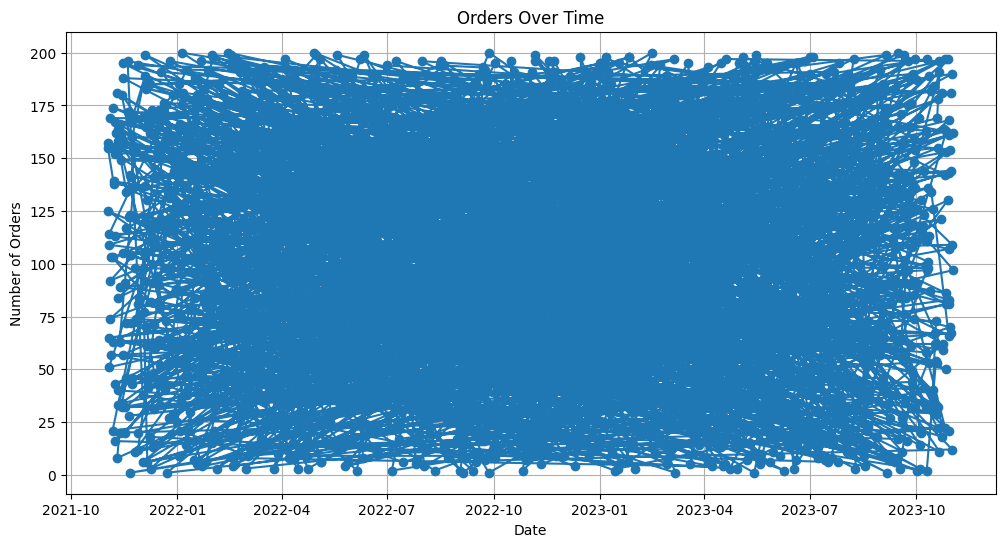

In [6]:
# Check basic statistics
print(df['Orders'].describe())

# Plot the orders over time
plt.figure(figsize=(12,6))
plt.plot(df['Orders'], marker='o', linestyle='-')
plt.title("Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()


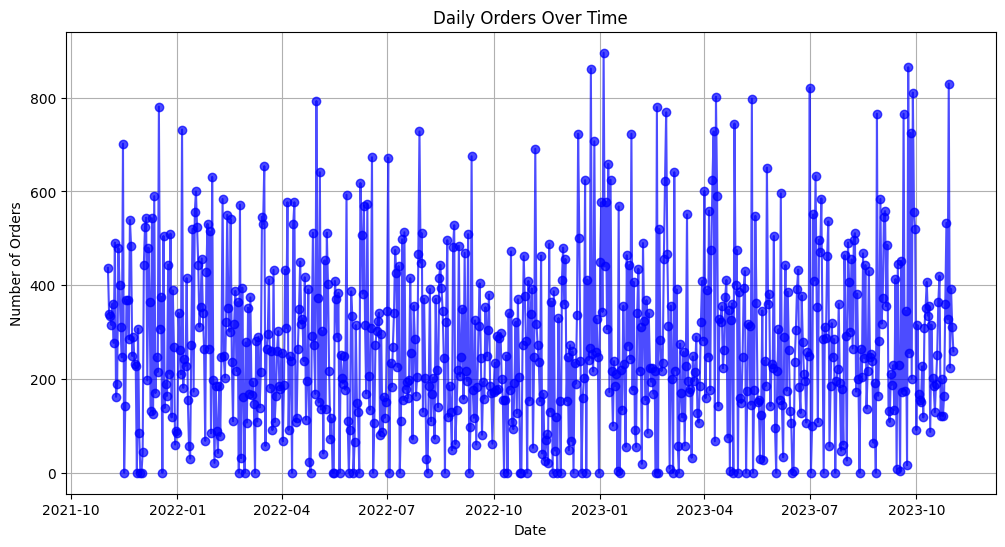

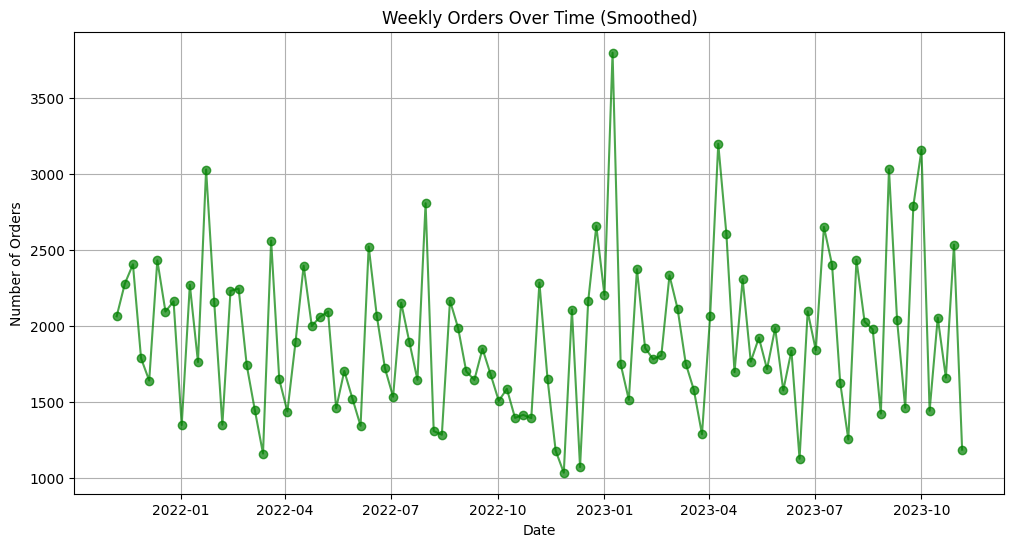

count    731.000000
mean     276.586867
std      185.623692
min        0.000000
25%      150.000000
50%      247.000000
75%      387.500000
max      896.000000
Name: Orders, dtype: float64
count     105.000000
mean     1925.571429
std       509.805862
min      1034.000000
25%      1576.000000
50%      1850.000000
75%      2204.000000
max      3799.000000
Name: Orders, dtype: float64


In [7]:
# 1. Aggregate orders per day
daily_orders = df['Orders'].resample('D').sum()  # Sum of orders for each date

# 2. Check for missing dates and fill with 0
daily_orders = daily_orders.asfreq('D', fill_value=0)

# 3. Optional: Resample weekly to smooth noise
weekly_orders = daily_orders.resample('W').sum()  # Total orders per week

# 4. Plot daily orders (aggregated)
plt.figure(figsize=(12,6))
plt.plot(daily_orders, marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title("Daily Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()

# 5. Plot weekly orders (smoothed)
plt.figure(figsize=(12,6))
plt.plot(weekly_orders, marker='o', linestyle='-', color='green', alpha=0.7)
plt.title("Weekly Orders Over Time (Smoothed)")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()

# 6. Check basic statistics after aggregation
print(daily_orders.describe())
print(weekly_orders.describe())




E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=1290.297, Time=4.08 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1280.340, Time=0.03 sec


E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1283.819, Time=0.84 sec


E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=1283.800, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=1514.319, Time=0.01 sec


E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=1282.340, Time=0.21 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=1282.338, Time=0.14 sec


E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[52] intercept   : AIC=1284.338, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=1281.820, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=1281.814, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=1283.787, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[52] intercept
Total fit time: 6.614 seconds


E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


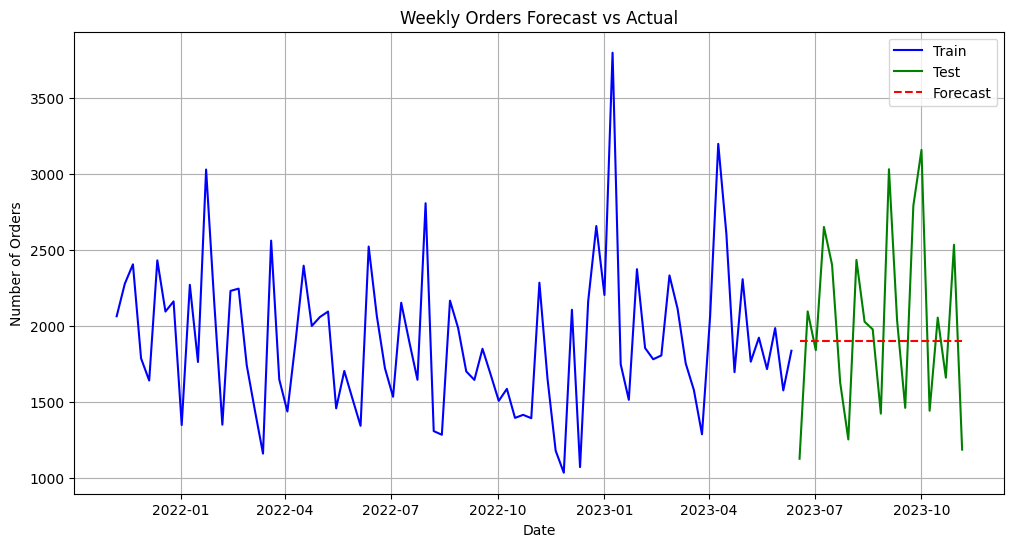

MAE: 498.57
RMSE: 599.49


E:\Users\pc\anaconda3\envs\ts_forecast\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


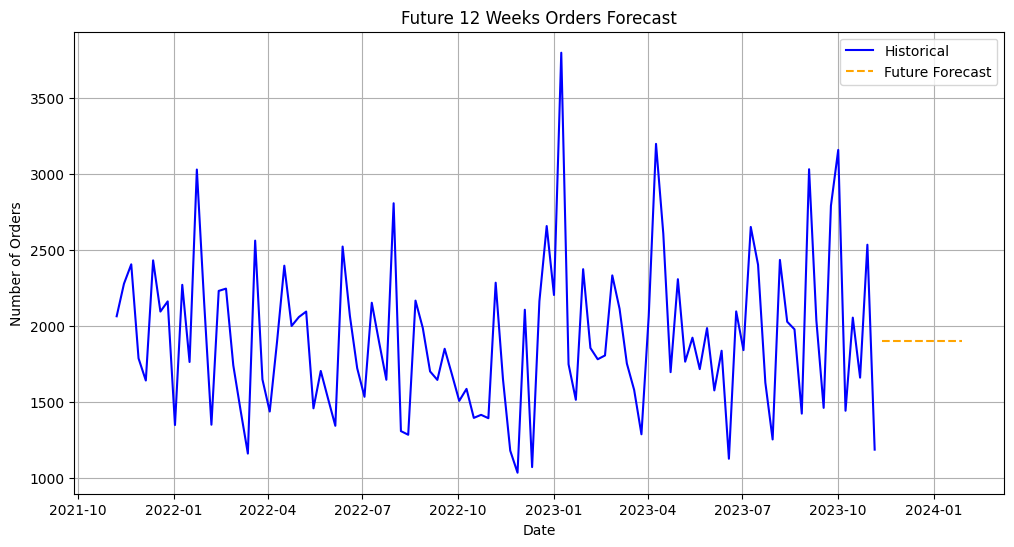

In [8]:
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Split data into train and test (80-20 split)
split_idx = int(len(weekly_orders) * 0.8)
train = weekly_orders[:split_idx]
test = weekly_orders[split_idx:]

# 2. Fit auto_arima model on training data
model = auto_arima(train, seasonal=True, m=52,  # 52 weeks in a year
                   trace=True, error_action='ignore', suppress_warnings=True)

# 3. Forecast for test period
n_periods = len(test)
forecast = model.predict(n_periods=n_periods)

# 4. Compare predictions with actual
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title("Weekly Orders Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.legend()
plt.grid(True)
plt.show()

# 5. Evaluate accuracy
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# 6. Forecast future 12 weeks
future_forecast = model.predict(n_periods=12)
future_dates = pd.date_range(start=weekly_orders.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')

plt.figure(figsize=(12,6))
plt.plot(weekly_orders.index, weekly_orders, label='Historical', color='blue')
plt.plot(future_dates, future_forecast, label='Future Forecast', color='orange', linestyle='--')
plt.title("Future 12 Weeks Orders Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Calculate MAPE
# MAPE measures the average size of the error as a percentage of the actual value.
mape = mean_absolute_percentage_error(test, forecast) * 100

# This provides the percentage of correct prediction.
accuracy_rate = 100 - mape


print("FORECAST ACCURACY METRICS")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Forecast Accuracy Rate (100% - MAPE): {accuracy_rate:.2f}%")

FORECAST ACCURACY METRICS
Mean Absolute Percentage Error (MAPE): 26.20%
Forecast Accuracy Rate (100% - MAPE): 73.80%
